### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] =  pd.to_datetime(df['Date/Time'])
#df['Date/Time']=df['Date/Time'].dt.date #extract the date portion from the datetime values

# Group by date and count the number of pickups
pick_cnt=df.groupby('Date/Time').size().reset_index(name='Total Pickups')


# Find the date with the highest number of pickups

date_max_pick=pick_cnt.max()
date_max_pick


Date/Time        2014-08-31 23:59:00
Total Pickups                     74
dtype: object

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [37]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
max_pick_row=df[df['Date/Time']==date_max_pick.loc['Date/Time']]

# Get the count of pickups on the highest date

pickup_count_on_max_date = date_max_pick.iloc[1]
print("Count of pickups on the date with the highest number of pickups:", pickup_count_on_max_date)


Count of pickups on the date with the highest number of pickups: 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [38]:
# Count the number of unique TLC base companies

unique_columns = df['Base'].nunique()

print("Number of unique TLC base companies:", unique_columns)


Number of unique TLC base companies: 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [39]:
# Group by TLC base company and count the number of pickups

num_pick=df.groupby('Base').size().reset_index(name='Number_of_pickups')

# Find the TLC base company with the highest number of pickups
highest_num_pick=num_pick.max()
highest_num_pick

Base                 B02764
Number_of_pickups    355803
dtype: object

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [40]:
# Group by TLC base company and count the number of pickups
num_pick=df.groupby('Base').size().reset_index(name='number_of_pickups')
num_pick



,Base,number_of_pickups
0,B02512,31472
1,B02598,220129
2,B02617,355803
3,B02682,173280
4,B02764,48591


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [3]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = pd.to_datetime(df['Date/Time']).dt.hour

# Group by hour and count the number of pickups
pickups_by_hour = df.groupby('Hour').size()

# Find the hour with the highest number of pickups
busiest_hour = pickups_by_hour.idxmax()
print('Busiest time of the day for Uber pickups (hour):', busiest_hour)



Busiest time of the day for Uber pickups (hour): 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

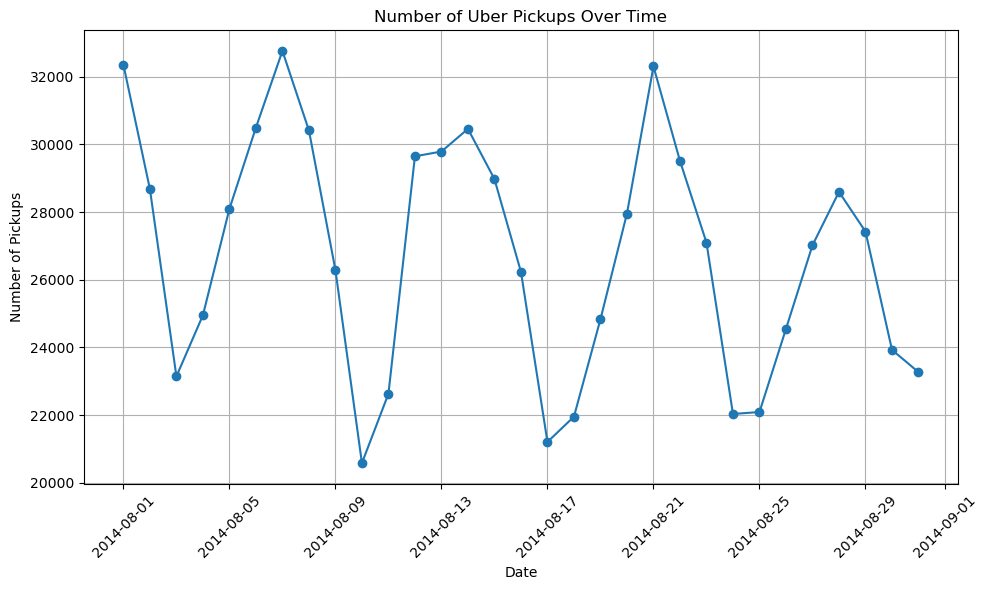

In [42]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickups_by_date = df.groupby('Date/Time').size()

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(10, 6))
plt.plot(pickups_by_date.index, pickups_by_date.values, marker='o', linestyle='-')
plt.title('Number of Uber Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

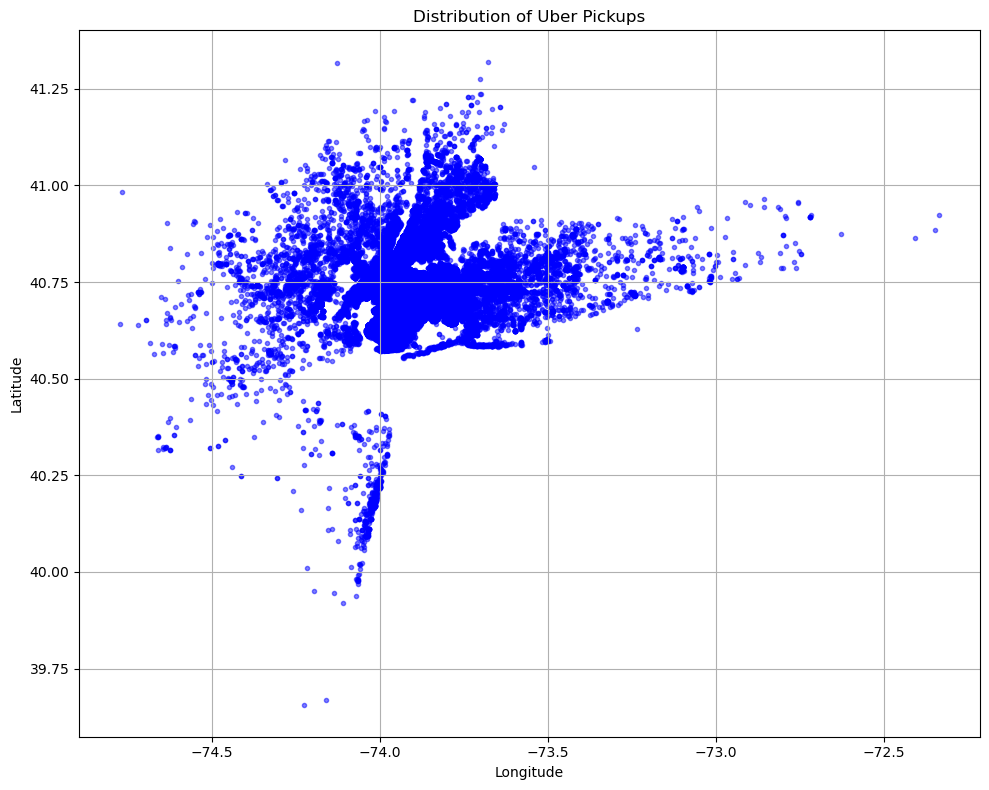

In [43]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(df['Lon'], df['Lat'], alpha=0.5, marker='.', color='b')
plt.title('Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

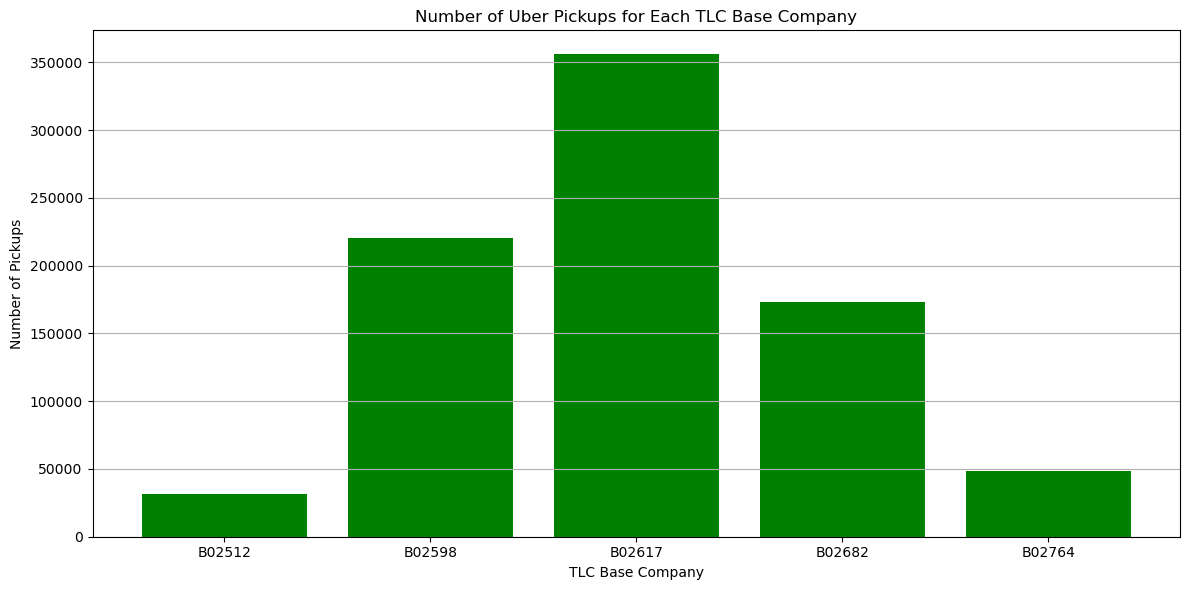

In [44]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.figure(figsize=(12, 6))
plt.bar(num_pick['Base'], num_pick['number_of_pickups'], color='green')
plt.title('Number of Uber Pickups for Each TLC Base Company')
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.grid(axis='y')
plt.tight_layout()


#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

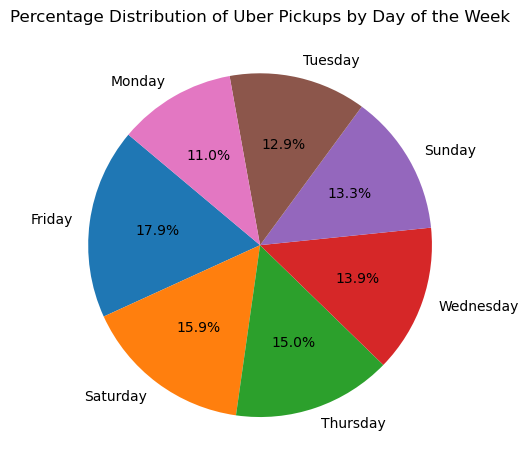

In [45]:
# Group by day of the week and count the number of pickups
pickups_by_day = pd.to_datetime(df['Date/Time']).dt.day_name().value_counts()
#create the percentage distribution of pickups for each day of the week
percentage_distribution=pickups_by_day/pickups_by_day.sum()*100
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(percentage_distribution,labels=percentage_distribution.index,autopct='%1.1f%%',startangle=140)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')

plt.tight_layout()
plt.show()